경사하강법(Gradient Descent)
   - SGDClassifier :  확률적 경사하강법을 적용한 알고리즘
   - 손실함수(Loss Function) : 손실함수를 최소화 하기 위해 학습
   - 모델의 파라메터 : weight(가중치) bias(편향)
   - 경사(Gradient) : 기울기 , 손실함수가 감소하는 방향
   - 학습률(Learning Rate)
   - 알고리즘
    - 초기 파라메터를 셋팅(초기화 랜덤한 값을 지정)
    - 경사의 반대 방향으로 파라메터를 업데이트, 현재 파라메터 값에서 학습률과 경사를 곱한 값을 빼는것으로
     - 위의 과정을 반복,, 최소가 될때까지(경사가 제로가 될때까지)

배치   
  -확률적 경사하강법 : 훈련데이터에서 데이터를 하나씩 꺼내서 학습
  - 미니배치 경사 하강법 : 랜덤하게 일정 개수를 꺼내서 학습
  - 배치 경사하강법 : 전체를 다 사용

           


In [1]:
# 라이브러리 로드
import numpy as np
import pandas as pd
url ='https://raw.githubusercontent.com/leekyuyoung20230313/pythone/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/data/data2.csv'
df = pd.read_csv(url)
df.head()

,Species,Weight,Length,Diagonal,Height,Width
0,A,242.0,25.4,30.0,11.5200,4.0200
1,A,290.0,26.3,31.2,12.4800,4.3056
2,A,340.0,26.5,31.1,12.3778,4.6961
3,A,363.0,29.0,33.5,12.7300,4.4555
4,A,430.0,29.0,34.0,12.4440,5.1340


In [2]:
# 모델 라이브러리
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=10,random_state=42)

In [10]:
# 데이터 전처리
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = df.iloc[:,1:].to_numpy()
y = df.iloc[:,0].to_numpy()
ss = StandardScaler()
x_train,x_test,y_train,y_test =  train_test_split(X,y ,random_state=100)
ss.fit(x_train)
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

In [11]:
# 모델 적용
# 확률적 경사 하강법
sc.fit(x_train,y_train)
sc.score(x_train,y_train), sc.score(x_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


(0.7983193277310925, 0.825)

In [12]:
# 미니배치 기법
sc.partial_fit(x_train,y_train)
sc.score(x_train,y_train), sc.score(x_test,y_test)

(0.8067226890756303, 0.75)

SGDClassfier 함수에 사용한 손실함수
  - 로지스틱 손실 함수(Logistic Loss Function)
    - 주로 이진분류 문제에 사용, 실제값과 예측사이의 오차를 측정
    - L(y, y') = -[y * log(y') + (1-y) * log(1-y')]
    - y'는 예측값으로 (0~1사이의값)
  - 힌지손실함수(Hinge Loss Function)
    - SVM(Support Vector Machin)에 사용되는 함수
    - 예측값과 실제값 사이의 마진(margin)오차를 츶겅
    - L(y, y') = max(0, 1 - y * y') 

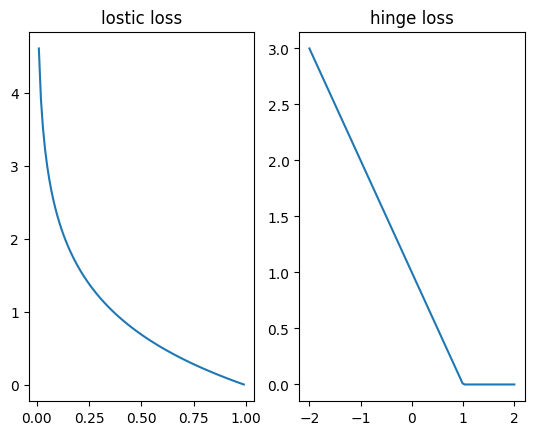

In [14]:
import matplotlib.pyplot as plt
def logistic_func(y,y_pred):
  return - (y* np.log(y_pred) + (1-y) * np.log(1 - y_pred))

def hinge_loss(y,y_pred):
  return np.maximum(0,1 - y*y_pred)  

y_true = 1
y_pred = np.linspace(0.01,0.99,100)
lostic_loss = logistic_func(y_true, y_pred)

y_pred2 = np.linspace(-2,2,100)
hinge_loss = hinge_loss(y_true, y_pred2)

plt.subplot(1,2,1)
plt.plot(y_pred,lostic_loss)
plt.title('lostic loss')
plt.subplot(1,2,2)
plt.plot(y_pred2,hinge_loss)
plt.title('hinge loss')
plt.show()

In [16]:
sc = SGDClassifier(loss='hinge', max_iter=10,random_state=42)
# 확률적 경사 하강법
sc.fit(x_train,y_train)
print(sc.score(x_train,y_train), sc.score(x_test,y_test))
# 미니배치 기법
sc.partial_fit(x_train,y_train)
print(sc.score(x_train,y_train), sc.score(x_test,y_test))

0.7899159663865546 0.8
0.7983193277310925 0.85


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


스케일링
  - 표준화(Statndardization)
    - 평균이 0 이고 표준편차가 1되도록 변환하는방법  z-score
    - Z = (X - μ) / σ
    - X는 각각의 데이터  μ 평균  σ 표준편차
    - 데이터의 분포를 중심으로 모으고 이상치(outlier)영향을 줄여주는 효과  선형회귀나 로지스틱회귀모델에서 사용하면 좋음
  - 정규화(Nomalization)
    - 최소-최대(Min-Max Scaling)
    - 최소값과 최대값 사이의 범위로 조정 , 0과 1사이로 조정 ,비교적 작은 범위로 스케일링, 모델을 학습할때 각 특성의 중요도를고르게 만들어 줌
    - X_scaled = (X - X_min) / (X_max - X_min)
    - 신경망(Neural Network)이나 이미지처리와 같은 모델
  - 로버스트 (Robust Scaling)
    - 중앙값(median) IQR(Interquartile Range)를 사용
    - 데이터에 이상치가 분포할때 이상치 영향을 적게 받는다

과적합과 조기종료(수동)

In [17]:
sc = SGDClassifier(loss='log_loss', random_state=42)
train_score = []
test_score = []
clasess = np.unique(y_train)
clasess

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [19]:
#미니배치 학습
for _ in range(300):
  sc.partial_fit(x_train,y_train,classes=clasess)
  train_score.append(sc.score(x_train,y_train))
  test_score.append(sc.score(x_test,y_test))

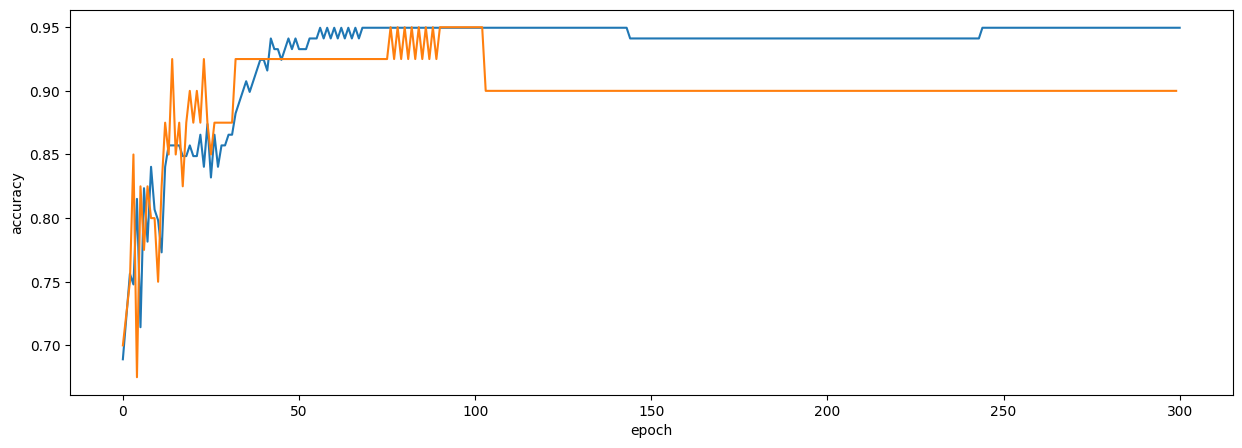

In [21]:
plt.figure(figsize=(15,5))
plt.plot(train_score,label='Training')
plt.plot(test_score,label='Validation')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [26]:
# tol=None 허용오차를 설정하지 않는다 
# 이 값을 설정하지 않으면 모델이 더 높은 정확도를 달성하기 위해 가능한 많은 반복을 수행
sc = SGDClassifier(loss='log_loss', tol=None, max_iter=100, random_state=42)
sc.fit(x_train,y_train)
sc.score(x_train,y_train), sc.score(x_test, y_test)

(0.9327731092436975, 0.9)

In [ ]:
x_train